
- Nama: Anissa Yulidha Rodiyah
- NIM: 202110370311304
- Matkul: UAP Pembelajaran Mesin



# Upload Dataset

In [1]:
from google.colab import files

# Unggah file
uploaded = files.upload()

Saving UAP_Dataset.zip to UAP_Dataset.zip


# Unzip Dataset

In [2]:
import zipfile

# Ekstrak file ZIP
with zipfile.ZipFile('UAP_Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')


# Pre-Processing

In [3]:
import pandas as pd

# Ganti 'diabetes.csv' dengan nama file dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Tampilkan beberapa baris pertama
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Jumlah Dataset

In [4]:
# Menghitung jumlah baris dan kolom
jumlah_baris, jumlah_kolom = df.shape

# Menampilkan jumlah baris dan kolom
print(f"Jumlah dataset: {jumlah_baris} baris, {jumlah_kolom} kolom")


Jumlah dataset: 100000 baris, 9 kolom


## EDA

In [5]:
# Menghitung jumlah label pada kolom 'diabetes'
label_counts = df['diabetes'].value_counts()

# Menampilkan jumlah masing-masing label
print(label_counts)


diabetes
0    91500
1     8500
Name: count, dtype: int64


In [6]:
pd.isnull(df).sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [7]:
# Menghitung jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 3854


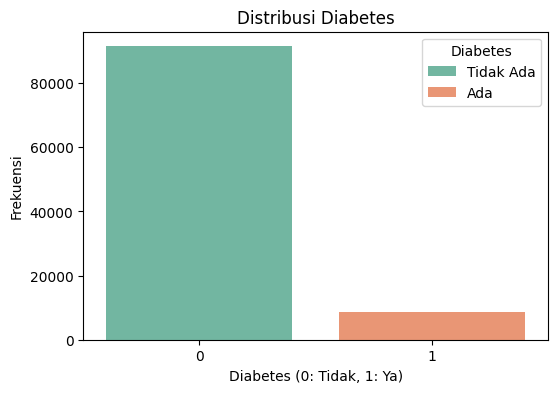

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label 'diabetes' dengan hue dan palette
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df, hue='diabetes', palette='Set2', dodge=False)
plt.title('Distribusi Diabetes')
plt.xlabel('Diabetes (0: Tidak, 1: Ya)')
plt.ylabel('Frekuensi')
plt.legend(title='Diabetes', labels=['Tidak Ada', 'Ada'], loc='upper right')  # Menambahkan label untuk legend
plt.show()


# Label Encoder

In [9]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
label_encoder = LabelEncoder()

# Kolom yang perlu di-encode
columns_to_encode = ['gender', 'smoking_history']  # Kolom kategorikal pada dataset Anda

# Dictionary untuk menyimpan mapping
column_mappings = {}

# Melakukan encoding dan menyimpan mapping
for column in columns_to_encode:
    label_encoder.fit(df[column])
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    column_mappings[column] = mapping
    df[column] = label_encoder.transform(df[column])

# Menampilkan hasil encoding
print("Hasil Encoding Dataset:")
print(df.head())

# Menampilkan mapping
print("\nMapping untuk setiap kolom:")
for column, mapping in column_mappings.items():
    print(f"{column}: {mapping}")


Hasil Encoding Dataset:
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Mapping untuk setiap kolom:
gender: {'Female': 0, 'Male': 1, 'Other': 2}
smoking_history: {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5}


# Min-MaxScaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Kolom numerik yang akan diskalakan
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Melakukan scaling dan mengganti nilai di dataset
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Menampilkan hasil scaling
print("Hasil Scaling dengan MinMaxScaler:")
print(df.head())


Hasil Scaling dengan MinMaxScaler:
   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  1.000000             0              1                4  0.177171   
1       0  0.674675             0              0                0  0.202031   
2       1  0.349349             0              0                4  0.202031   
3       0  0.449449             0              0                1  0.156863   
4       1  0.949950             1              1                1  0.118231   

   HbA1c_level  blood_glucose_level  diabetes  
0     0.563636             0.272727         0  
1     0.563636             0.000000         0  
2     0.400000             0.354545         0  
3     0.272727             0.340909         0  
4     0.236364             0.340909         0  


# Train test Split

In [11]:
from sklearn.model_selection import train_test_split

# Definisikan fitur (X) dan label/target (y)
X = df.drop(columns=['diabetes'])  # Semua kolom kecuali 'diabetes'
y = df['diabetes']                # Kolom target

# Membagi dataset menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan hasil pembagian data
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 80000
Jumlah data test: 20000


# Modeling Random Forest Classifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Definisikan fitur (X) dan label/target (y)
X = df.drop(columns=['diabetes'])  # Semua kolom kecuali 'diabetes'
y = df['diabetes']                # Kolom target

# Membagi dataset menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan hasil pembagian data
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# Menstandarisasi fitur agar model bekerja lebih baik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model RandomForestClassifier tanpa SMOTE
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Prediksi pada data test tanpa SMOTE
y_pred_no_smote = model_rf.predict(X_test_scaled)

# Menampilkan classification report sebelum SMOTE
print("Classification Report Sebelum SMOTE:")
print(classification_report(y_test, y_pred_no_smote))


Jumlah data train: 80000
Jumlah data test: 20000
Classification Report Sebelum SMOTE:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



## SMOTE

In [13]:
# Menggunakan SMOTE untuk menangani ketidakseimbangan kelas pada data train
# Tentukan batas augmentasi maksimal 1:4
smote = SMOTE(sampling_strategy=0.25, random_state=42)  # 1:4 berarti 0.25 (jumlah augmentasi = 25% dari data asli)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Melatih model_rf RandomForestClassifier dengan data yang sudah di-resample
model_rf.fit(X_train_res, y_train_res)

# Prediksi pada data test setelah SMOTE
y_pred_smote = model_rf.predict(X_test_scaled)

# Menampilkan classification report setelah SMOTE
print("Classification Report Setelah SMOTE:")
print(classification_report(y_test, y_pred_smote))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Classification Report Setelah SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.89      0.71      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.93      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



# Confusion Matrix

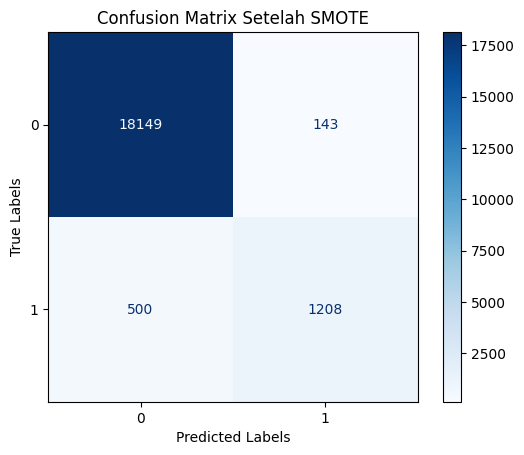

In [14]:
# Mengimport library untuk membuat confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model_rf.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix Setelah SMOTE")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
plt.show()


# Simpan Model

In [15]:
import pickle

# Menyimpan model RandomForestClassifier ke file .sav
with open('random_forest_model.sav', 'wb') as f:
    pickle.dump(model_rf, f)